# MLA - Uebung 1 
Gerald Ebmer, e01325683

# Problem 1.1

## 1.1.1

Index(['x', 'y'], dtype='object')
Index(['x', 'y'], dtype='object')


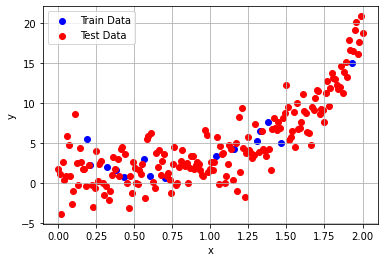

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the data from the CSV files using pandas
train_data = pd.read_csv('regression_train.csv')
test_data = pd.read_csv('regression_test.csv')

# show columns of train_data
print(train_data.columns)
print(test_data.columns)

# Generate a scatterplot of Ttrain and Ttest
plt.scatter(train_data['x'], train_data['y'], c='blue', label='Train Data')
plt.scatter(test_data['x'], test_data['y'], c='red', label='Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


In [15]:
# number of training samples
n_train = len(train_data)
print('Number of training samples: ', n_train)

# number of test samples
n_test = len(test_data)
print('Number of test samples: ', n_test)

Number of training samples:  3
Number of test samples:  17


## 1.1.2

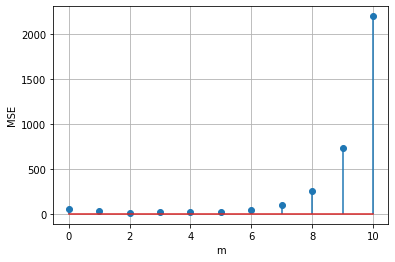

In [18]:
import numpy as np

def solve_ls(x,y,m):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the least squares solution
    p = np.linalg.pinv(S) @ y
    return p

def est_ls(x,m,p):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the mean squared error
    y_est = S @ p
    return y_est

def get_mse(x,y,m,p):
    # Calculate the mean squared error
    y_est = est_ls(x,m,p)
    mse = np.mean((y_est - y)**2)
    return mse

# Calculate the least squares solution for m=1..10
mse_ls = []
for m in range(0,11):
    p = solve_ls(train_data['x'], train_data['y'], m)
    mse = get_mse(test_data['x'], test_data['y'], m, p)
    mse_ls.append(mse)

# stem plot for mse_ls
plt.stem(range(0,11), mse_ls)
plt.xlabel('m')
plt.ylabel('MSE')
plt.grid()
plt.show()

In [16]:
# Index of minimum MSE
m_opt = np.argmin(mse_ls)
print('Optimal degree of polynomial: ', m_opt)

Optimal degree of polynomial:  2


Minimum MSE at m = 2 (-> 3 coefficients) due to number of training samples 3. 

## 1.1.3

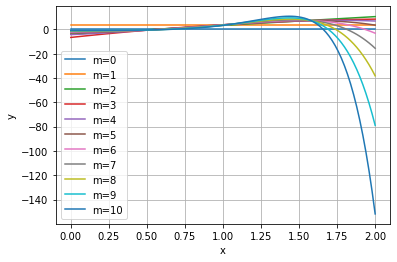

In [19]:
x = np.linspace(0, 2, 100)

for m in range(0,11):
    p = solve_ls(train_data['x'], train_data['y'], m)
    y_est = est_ls(x,m,p)
    mse_ls.append(mse)
    # plot y_est for m=1..10
    plt.plot(x, y_est, label='m='+str(m))
    # hold on

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()



## 1.1.4 Analytical solution for Ridge regression

## 1.1.5 Ridge regression

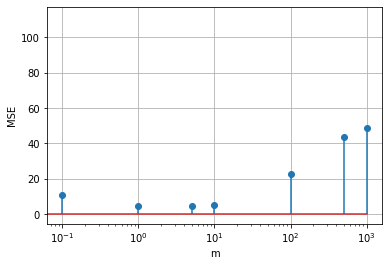

p_ls:  [-2.94675647  2.41336295  3.92035228  2.4486085  -2.10210303]
p_ridge:  [ 4.980609    8.87831207  1.63857404  5.58444698 -3.93390977]
delta y_est:  [0. 0. 0.]


In [25]:
def solve_ridge(x,y,m,l):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the least squares solution
    p = np.linalg.inv(l*np.eye(m) + S.transpose() @ S) @ S.transpose() @ y
    return p

def est_ridge(x,m,p):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the mean squared error
    y_est = S @ p
    return y_est

def get_mse_ridge(x,y,m,p):
    # Calculate the mean squared error
    y_est = est_ridge(x,m,p)
    mse = np.mean((y_est - y)**2)
    return mse

# Calculate the least squares solution for m=1..10
mse_ridge = []
m = 5
l_ls = [0, 0.1, 1, 5, 10, 100, 500, 1000]
for l in l_ls:
    p = solve_ridge(train_data['x'], train_data['y'], m, l)
    mse = get_mse_ridge(test_data['x'], test_data['y'], m, p)
    mse_ridge.append(mse)

plt.stem(l_ls, mse_ridge)
plt.semilogx()
plt.xlabel('m')
plt.ylabel('MSE')
plt.grid()
plt.show()

# sanity check
m = 5
l = 0
p_ls = solve_ls(train_data['x'], train_data['y'], m)
p_ridge = solve_ridge(train_data['x'], train_data['y'], m, l)
y_ls = est_ls(train_data['x'],m,p)
y_ridge = est_ridge(train_data['x'],m,p)
print('p_ls: ', p_ls)
print('p_ridge: ', p_ridge)
print('delta y_est: ', y_ls - y_ridge)


## 1.1.6 Ridge regression TODO

# Problem 1.2

## 1.2.1 Plot data

Index(['Unnamed: 0', 'x_0', 'x_1', 'y'], dtype='object')
Index(['Unnamed: 0', 'x_0', 'x_1', 'y'], dtype='object')


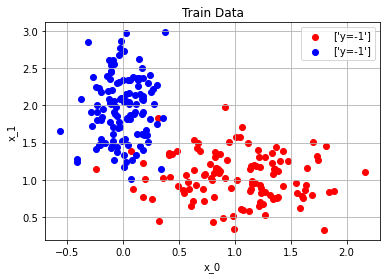

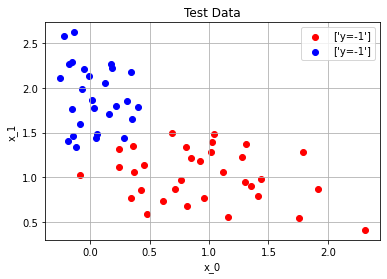

In [40]:
train_data = pd.read_csv('data_blob_train.csv')
test_data = pd.read_csv('data_blob_test.csv')

# show columns of train_data
print(train_data.columns)
print(test_data.columns)


def separate_data(df, y_value):
    x_0_list = df[df['y'] == y_value]['x_0'].tolist()
    x_1_list = df[df['y'] == y_value]['x_1'].tolist()
    return x_0_list, x_1_list

def scatter_plt(df,  title):
    x_0_list_0, x_1_list_0 = separate_data(df, -1)
    x_0_list_1, x_1_list_1 = separate_data(df, 1)

    plt.scatter(x_0_list_0, x_1_list_0, c='red', label=['y=-1'])
    plt.scatter(x_0_list_1, x_1_list_1, c='blue', label=['y=-1'])
    plt.xlabel('x_0')
    plt.ylabel('x_1')
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()


scatter_plt(train_data, 'Train Data')
scatter_plt(test_data, 'Test Data')

## 1.2.2 Fit classifier

[-0.93029161  0.67039489 -0.52925971]
Accuracy of training data:  0.9791666666666666
Accuracy of test data:  0.95


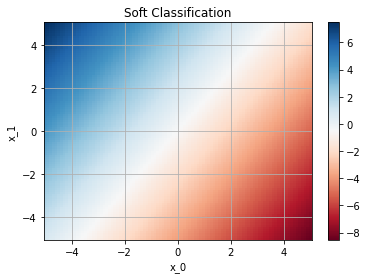

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix

S = np.ones((len(train_data), 3))
S[:, 0] = train_data['x_0']
S[:, 1] = train_data['x_1']
y = train_data['y']

# solve LS 
p = np.linalg.pinv(S) @ y
print(p)

# plot the decision boundary
x_0 = np.linspace(-5, 5, 100)
x_1 = np.linspace(-5, 5, 100)
X_0, X_1 = np.meshgrid(x_0, x_1)

def threshold_softclass(y_soft):
    y_hard = np.zeros(len(y_soft))
    y_hard[y_soft > 0] = 1
    y_hard[y_soft < 0] = -1
    return y_hard

# write function to calculate accuracy of estimation
def get_accuracy(x0,x1,y,p):
    S = np.ones((len(x0), 3))
    S[:, 0] = x0
    S[:, 1] = x1
    y_est = S @ p
    y_est = threshold_softclass(y_est.flatten())
    confusion = confusion_matrix(y, y_est)
    accuracy = (confusion[0,0] + confusion[1,1]) / len(y)
    return accuracy

# accuracy of training data
err_train = get_accuracy(train_data['x_0'], train_data['x_1'], train_data['y'],p)
print('Accuracy of training data: ', err_train)

# accuracy of test data
err_test = get_accuracy(test_data['x_0'], test_data['x_1'], test_data['y'],p)
print('Accuracy of test data: ', err_test)

# Heat map
x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)
X0, X1 = np.meshgrid(x0, x1)
S = np.ones((len(X0.flatten()), 3))
S[:, 0] = X0.flatten()
S[:, 1] = X1.flatten()
y_soft = S @ p
Y_soft = y_soft.reshape(X0.shape)
plt.pcolormesh(X0, X1, Y_soft, cmap='RdBu')
plt.colorbar()
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.grid()
plt.title('Soft Classification')
plt.show()


## 1.2.3 Decision Surface

$ y_\text{est} = w_0 x_0 + w_1 x_1 + w_2 $
--> line separating $y = +1$, $y = -1$ --> $ y_\text{est} = 0 $

$ x_1 = (-w_0 x_0 - w_2) / w_1 $

Index(['Unnamed: 0', 'x_0', 'x_1', 'y'], dtype='object')
Index(['Unnamed: 0', 'x_0', 'x_1', 'y'], dtype='object')


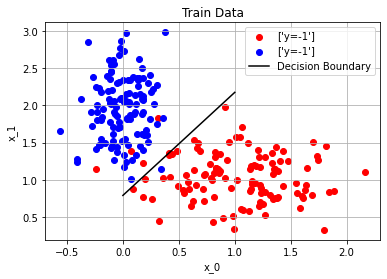

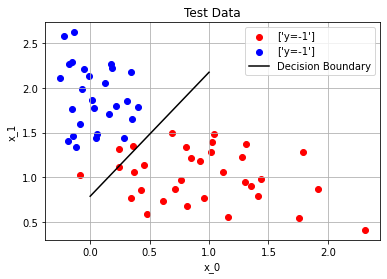

In [43]:
train_data = pd.read_csv('data_blob_train.csv')
test_data = pd.read_csv('data_blob_test.csv')

# show columns of train_data
print(train_data.columns)
print(test_data.columns)


def separate_data(df, y_value):
    x_0_list = df[df['y'] == y_value]['x_0'].tolist()
    x_1_list = df[df['y'] == y_value]['x_1'].tolist()
    return x_0_list, x_1_list

def scatter_plt(df,  title, p):
    x_0_list_0, x_1_list_0 = separate_data(df, -1)
    x_0_list_1, x_1_list_1 = separate_data(df, 1)

    # plot the decision boundary
    x_0 = np.linspace(0, 1, 100)
    x_1 = -(p[2] + p[0]*x_0) / p[1]


    plt.scatter(x_0_list_0, x_1_list_0, c='red', label=['y=-1'])
    plt.scatter(x_0_list_1, x_1_list_1, c='blue', label=['y=-1'])
    plt.plot(x_0, x_1, c='black', label='Decision Boundary')
    plt.xlabel('x_0')
    plt.ylabel('x_1')
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()


scatter_plt(train_data, 'Train Data', p)
scatter_plt(test_data, 'Test Data', p)

## 1.2.4 Try the samples

In [25]:
s1 = np.array([-10,10,1])
s2 = np.array([0,1.5,-1])

S = np.ones((2, 3))
S[0,:2] = s1[:2]
S[1,:2] = s2[:2]
y1 = s1[2]
y2 = s2[2]

y_est = S @ p
print("y true: ", [y1, y2])
print("y_soft: ", y_est) 

print("L2 error y_soft1:" , np.linalg.norm(y_est[0] - y1))
print("L2 error y_soft2:" , np.linalg.norm(y_est[1] - y2))

y_est = threshold_softclass(y_est)
print("y_hard: ", y_est) 

print("L2 error y_hard1:" , np.linalg.norm(y_est[0] - y1))
print("L2 error y_hard2:" , np.linalg.norm(y_est[1] - y2))

y true:  [1, -1.0]
y_soft:  [15.4776053   0.47633263]
L2 error y_soft1: 14.47760529714548
L2 error y_soft2: 1.4763326325127841
y_hard:  [1. 1.]
L2 error y_hard1: 0.0
L2 error y_hard2: 2.0


Due to the nonlinear thresholding of the hard classifier the L2 error of the soft classifier is high in the first example although the thesholded estimation is correct. 
Hence, for binary classifiers the usage of the continuous soft classifier is problematic.

## 1.2.5 Moon Dataset

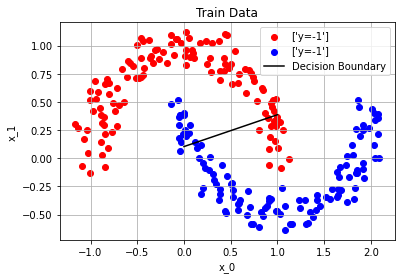

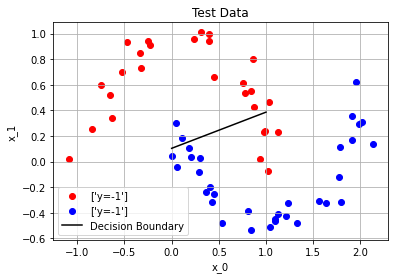

In [27]:
train_data = pd.read_csv('data_moon_train.csv')
test_data = pd.read_csv('data_moon_test.csv')

S = np.ones((len(train_data), 3))
S[:, 0] = train_data['x_0']
S[:, 1] = train_data['x_1']
y = train_data['y']

# solve LS 
p = np.linalg.pinv(S) @ y

scatter_plt(train_data, 'Train Data', p)
scatter_plt(test_data, 'Test Data', p)

A linear classifier is a particular bad choice for this dataset, as can be seen above.

# Problem 1.3

## 1.3.1

In [7]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Fetch the California housing dataset and store it as a DataFrame
# california_housing = fetch_california_housing(as_frame=True, download_if_missing=False)

# Create a Pandas DataFrame from the dataset
# california_df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)


# Download the dataset and load it into a DataFrame
data = fetch_california_housing(as_frame=True, download_if_missing=True)
df = data.frame

# Examine the summary statistics
description = df.describe()
print("Summary Statistics:")
print(description)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the feature with the highest correlation with the target value
target_correlation = correlation_matrix['MedHouseVal'].abs().sort_values(ascending=False)
print("\nCorrelation with Target:")
print(target_correlation)

Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0

Highest correlation with the target MedHouseVal is the MedInc (median income) data.

## 1.3.2

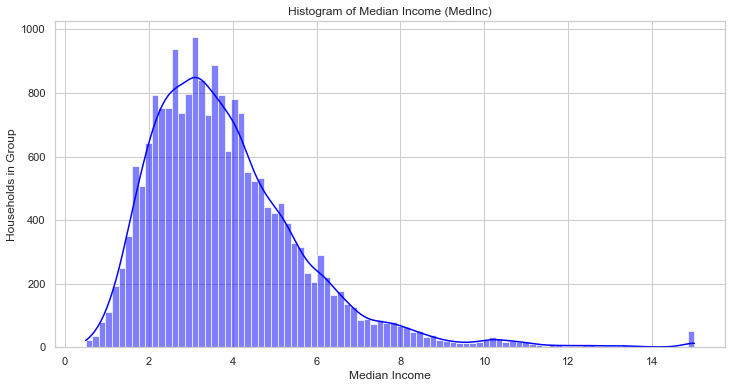

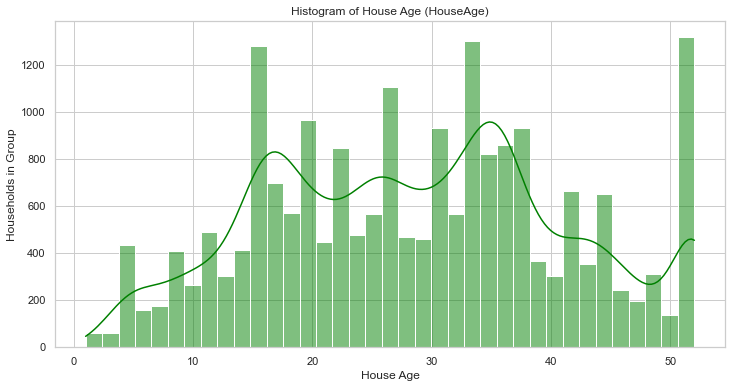

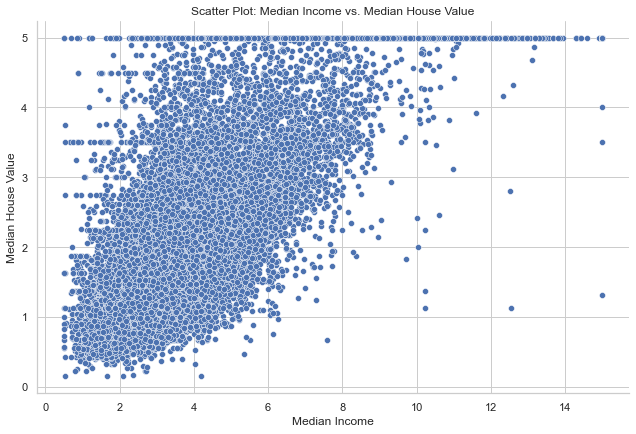

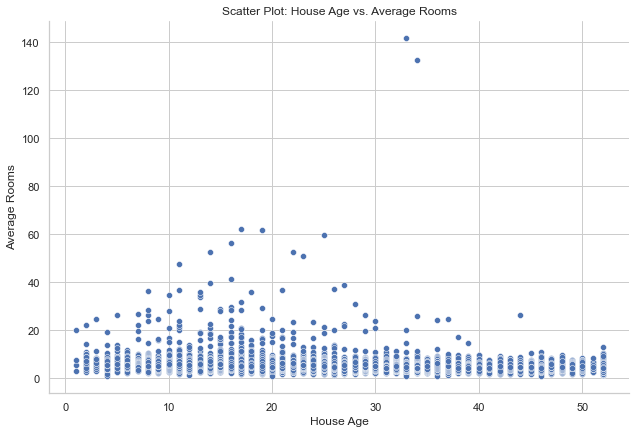

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Load the California housing dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True, download_if_missing=False)
df = data.frame

# Generate histograms for individual features
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="MedInc", kde=True, color='blue')
plt.title("Histogram of Median Income (MedInc)")
plt.xlabel("Median Income")
plt.ylabel("Households in Group")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="HouseAge", kde=True, color='green')
plt.title("Histogram of House Age (HouseAge)")
plt.xlabel("House Age")
plt.ylabel("Households in Group")
plt.show()

# Create scatter plots to explore relationships between features
sns.set(style="whitegrid", context="notebook")
sns.relplot(x="MedInc", y="MedHouseVal", data=df, kind="scatter", height=6, aspect=1.5)
plt.title("Scatter Plot: Median Income vs. Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

sns.relplot(x="HouseAge", y="AveRooms", data=df, kind="scatter", height=6, aspect=1.5)
plt.title("Scatter Plot: House Age vs. Average Rooms")
plt.xlabel("House Age")
plt.ylabel("Average Rooms")
plt.show()


## 1.3.3

In [11]:
# Shuffle the dataset
shuffled_df = df.sample(frac=1, random_state=1)

# Split the shuffled dataset into training and test data
num_train_samples = 15000

# Use the first 15,000 elements as Ttrain
Ttrain = shuffled_df.iloc[:num_train_samples]

# Use the remaining elements as Ttest
Ttest = shuffled_df.iloc[num_train_samples:]

# Verify the shapes of the training and test sets
print("Ttrain shape:", Ttrain.shape)
print("Ttest shape:", Ttest.shape)

Ttrain shape: (15000, 9)
Ttest shape: (5640, 9)


In [12]:
from sklearn.linear_model import Ridge
import numpy as np

# Separate the target variable from the features
X_train = Ttrain.drop(columns=["MedHouseVal"])
y_train = Ttrain["MedHouseVal"]

# Fit a Ridge regressor with alpha=1 to the training data
ridge_regressor = Ridge(alpha=1)
ridge_regressor.fit(X_train, y_train)

# Extract the weight vector (coefficients) and the intercept
weights = ridge_regressor.coef_
intercept = ridge_regressor.intercept_

# Create a list of features sorted by their weights
feature_weights = list(zip(X_train.columns, weights))
sorted_feature_weights = sorted(feature_weights, key=lambda x: abs(x[1]), reverse=True)

# Print the sorted features and their weights
for feature, weight in sorted_feature_weights:
    impact = "Positive" if weight > 0 else "Negative"
    print(f"Feature: {feature}, Weight: {weight:.4f}, Impact: {impact}")

# Print the intercept
print("Intercept:", intercept)


Feature: AveBedrms, Weight: 0.8164, Impact: Positive
Feature: MedInc, Weight: 0.4481, Impact: Positive
Feature: Longitude, Weight: -0.4362, Impact: Negative
Feature: Latitude, Weight: -0.4201, Impact: Negative
Feature: AveRooms, Weight: -0.1327, Impact: Negative
Feature: HouseAge, Weight: 0.0096, Impact: Positive
Feature: AveOccup, Weight: -0.0046, Impact: Negative
Feature: Population, Weight: -0.0000, Impact: Negative
Intercept: -37.28574115057425


## 1.3.5

MAE for Ttrain: 0.5307880302715707
MAE for Ttest: 0.5281930373367361


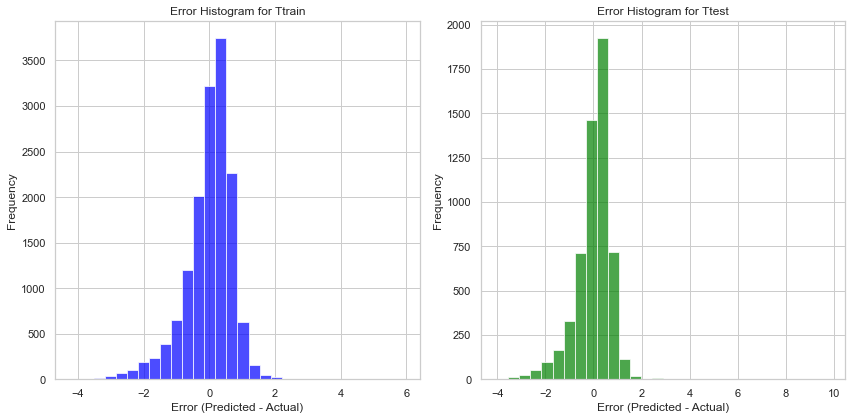

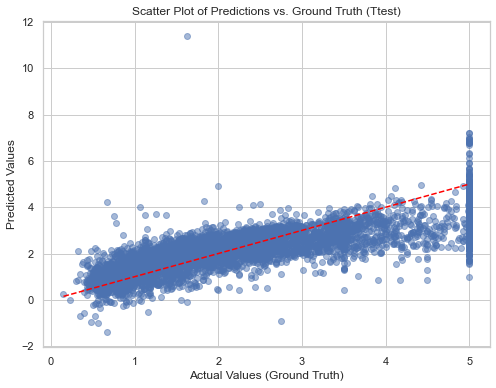

In [14]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Make predictions on Ttrain and Ttest
X_test = Ttest.drop(columns=["MedHouseVal"])
y_test = Ttest["MedHouseVal"]
y_pred_test = ridge_regressor.predict(X_test)
y_pred_train = ridge_regressor.predict(X_train)

# Compute MAE for Ttrain and Ttest
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("MAE for Ttrain:", mae_train)
print("MAE for Ttest:", mae_test)

# Visualize the error using histograms for Ttrain and Ttest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
error_train = y_pred_train - y_train
plt.hist(error_train, bins=30, color='blue', alpha=0.7)
plt.title("Error Histogram for Ttrain")
plt.xlabel("Error (Predicted - Actual)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
error_test = y_pred_test - y_test
plt.hist(error_test, bins=30, color='green', alpha=0.7)
plt.title("Error Histogram for Ttest")
plt.xlabel("Error (Predicted - Actual)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Generate a scatter plot of predictions vs. ground truth values for Ttest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title("Scatter Plot of Predictions vs. Ground Truth (Ttest)")
plt.xlabel("Actual Values (Ground Truth)")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()


In case of 0 MAE the predicitons (red line) would be curved.

## 1.3.6

In [16]:
from sklearn.model_selection import cross_val_predict

# Concatenate Ttrain and Ttest to use all available data
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

# Perform 10-fold cross-validation using cross_val_predict
ridge_regressor = Ridge(alpha=1)
y_pred_cv = cross_val_predict(ridge_regressor, X_full, y_full, cv=10)

# Calculate the Mean Absolute Error (MAE) manually
mae_scores = np.abs(y_full - y_pred_cv)
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print("Mean MAE:", mean_mae)
print("Standard Deviation of MAE:", std_mae)

Mean MAE: 0.5317730015057269
Standard Deviation of MAE: 0.4954398572540153


## 1.3.7

Mean MAE: 0.32400949250000016
Standard Deviation of MAE: 0.3785009951847409


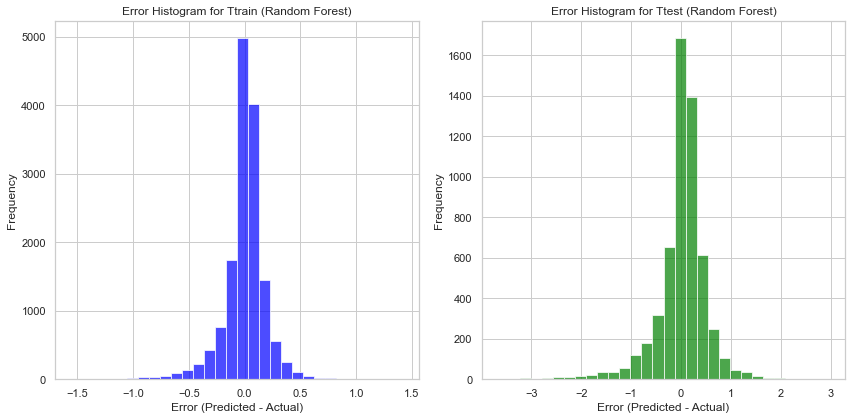

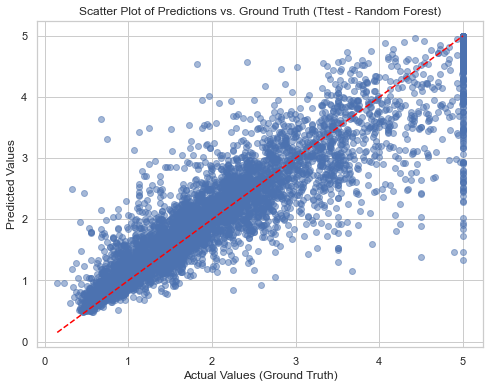

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest Regressor to the training data
rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(X_train, y_train)

# Make predictions on Ttrain and Ttest
y_pred_rf_train = rf_regressor.predict(X_train)
y_pred_rf_test = rf_regressor.predict(X_test)


y_pred_cv = cross_val_predict(rf_regressor, X_full, y_full, cv=10)

# Calculate the Mean Absolute Error (MAE) manually
mae_scores = np.abs(y_full - y_pred_cv)
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print("Mean MAE:", mean_mae)
print("Standard Deviation of MAE:", std_mae)


# Visualize the error using histograms for Ttrain and Ttest (Random Forest)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
error_rf_train = y_pred_rf_train - y_train
plt.hist(error_rf_train, bins=30, color='blue', alpha=0.7)
plt.title("Error Histogram for Ttrain (Random Forest)")
plt.xlabel("Error (Predicted - Actual)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
error_rf_test = y_pred_rf_test - y_test
plt.hist(error_rf_test, bins=30, color='green', alpha=0.7)
plt.title("Error Histogram for Ttest (Random Forest)")
plt.xlabel("Error (Predicted - Actual)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Generate a scatter plot of predictions vs. ground truth values for Ttest (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_test, alpha=0.5)
plt.title("Scatter Plot of Predictions vs. Ground Truth (Ttest - Random Forest)")
plt.xlabel("Actual Values (Ground Truth)")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()


Random Forest vs. Ridge Regression:

   - Complexity: Random Forest captures nonlinearity, Ridge is linear.
   - Performance: Random Forest excels with complex data, Ridge for linearity.
   - Errors: Random Forest may yield smaller, data-tailored errors.
   - Interpretability: Ridge offers clear feature weights; Random Forest has less interpretable importance scores.

# Problem 1.4

## 1.4.1

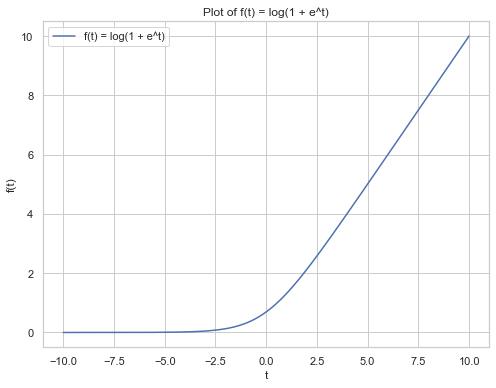

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate t values in the specified interval
t = np.linspace(-10, 10, 500)  # You can adjust the number of points (500 in this case) for smoother or coarser plotting

# Compute the corresponding f(t) values
f_t = np.log(1 + np.exp(t))

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(t, f_t, label='f(t) = log(1 + e^t)', color='b')
plt.title('Plot of f(t) = log(1 + e^t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.legend()
plt.show()


The loss function gets minimal (saturates) in case of negative exponent, which is the case for $y$ and $\hat{y}$ having the same sign.

## 1.4.2

Gradient:
$\nabla f = \frac{ -y_i e^{-y_i(\vec{x}^T w + b)}}{1 + e^{-y_i(\vec{x}^T w + b)}} [\vec{x},b]^T$

In [54]:
import numpy as np

def loss(y_ls, x_ls, w, b):
    wx = np.dot(w.transpose(), x_ls)
    loss_values = np.log(1 + np.exp(-y_ls * (wx + b)))
    return np.sum(loss_values)

def grad_loss(y_ls, x_ls, w, b):
    wx = np.dot(w.transpose(), x_ls)
    exp_term = np.exp(-y_ls * (wx + b))
    
    grad_term = exp_term / (1 + exp_term)
    grad = -y_ls * np.vstack([x_ls, np.ones((1, x_ls.shape[1]))]) * grad_term
    
    # Sum the gradients over all samples
    return np.sum(grad, axis=1, keepdims=True)

# Example usage
N = 5
x_ls = np.random.randn(2, N)
y_ls = np.array([1, -1, 1, -1, 1])
w = np.array([0.5, 0.5])
b = 0.1

loss_value = loss(y_ls, x_ls, w, b)
grad_value = grad_loss(y_ls, x_ls, w, b)

print("Loss:", loss_value)
print("Gradient:", grad_value)


Loss: 4.195725510110887
Gradient: [[ 0.79150576]
 [ 1.55260954]
 [-0.3439946 ]]


check gradient computation:

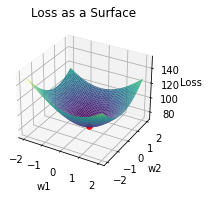

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate data (x and y)
N = 100  # Number of data points
x = np.random.randn(2, N)
y = np.random.choice([-1, 1], N)

# Fix the value of b
b = 0.5

# Create a meshgrid for w1 and w2
w1_values = np.linspace(-2, 2, 100)
w2_values = np.linspace(-2, 2, 100)
w1_mesh, w2_mesh = np.meshgrid(w1_values, w2_values)
loss_values = np.zeros_like(w1_mesh)

# Calculate loss for each combination of w1 and w2
for i in range(len(w1_values)):
    for j in range(len(w2_values)):
        w = np.array([w1_values[i], w2_values[j]])
        loss_values[i, j] = loss(y, x, w, b)

# Create a 3D surface plot for the loss

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

# Plot the loss as a surface
surface = ax.plot_surface(w1_mesh, w2_mesh, loss_values, cmap='viridis')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss')
ax.set_title('Loss as a Surface')

# Calculate the gradient for the loss at the minimum point
w_min = np.unravel_index(loss_values.argmin(), loss_values.shape)
w_opt = np.array([w1_values[w_min[0]], w2_values[w_min[1]]])
grad = grad_loss(y, x, w_opt, b)

# Plot the gradient as a red sphere at the minimum point
ax.scatter(w_opt[0], w_opt[1], loss(y, x, w_opt, b), c='red', s=30, marker='o')


plt.show()


Ran this code in separate python file to have interactive plot. Confirmed that lowest gradient is at bottom of loss curve.

## 1.4.3 Gradient descent

In [56]:
def grad_desc(x,y,param0,alpha,k):
    params = param0
    params_ls = []
    loss_ls = []
    for i in range(k):
        grad = grad_loss(y, x, params[:2], params[2])
        params = params - alpha * grad
        params_ls.append(params)

        loss_value = loss(y, x, params[:2], params[2])
        loss_ls.append(loss_value)

    return params, params_ls, loss_ls

## 1.4.4 fit perceptron

In [57]:
import pandas as pd

b0 = 2
param0 = np.array([0, -2, b0]).reshape((3,1))

K=600
alpha = 0.001

data = pd.read_csv('classification.csv')
x0 = data['x_0'].to_numpy()
x1 = data['x_1'].to_numpy()
x = np.vstack([x0, x1])
y = data['target'].to_numpy()

params, param_ls, loss_ls = grad_desc(x,y,param0,alpha,K)
print("w_opt: ", params[:2])
print("b_opt: ", params[2])

w_opt:  [[-3.07858546]
 [ 0.57542174]]
b_opt:  [0.51278313]


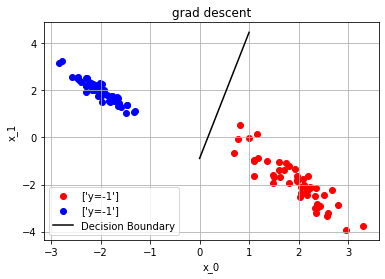

Accuracy of training data:  1.0


In [58]:
data.rename(columns={'target': 'y'}, inplace=True)
scatter_plt(data, 'grad descent', params)

# accuracy of training data
err_train = get_accuracy(data['x_0'], data['x_1'], data['y'],params)
print('Accuracy of training data: ', err_train)

## 1.4.5 plot evolution of params and loss

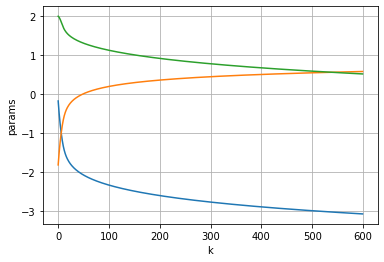

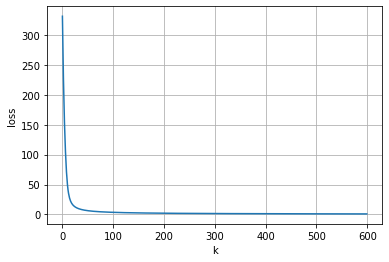

In [62]:
# plot params_ls
param_ls = np.array(param_ls)
plt.plot(range(K), param_ls[:,0], label='w_0')
plt.plot(range(K), param_ls[:,1], label='w_1')
plt.plot(range(K), param_ls[:,2], label='b')
plt.xlabel('k')
plt.ylabel('params')
plt.grid()
plt.show()

# plot loss_ls
plt.plot(range(K), loss_ls)
plt.xlabel('k')
plt.ylabel('loss')
plt.grid()
plt.show()

## 1.4.6 check loss for given samples (see 1.2.4)

In [65]:
s1 = np.array([-100,0,1])
s2 = np.array([-1,0,-1])

J1 = loss(s1[2], s1[:2], params[:2], params[2])
J2 = loss(s2[2], s2[:2], params[:2], params[2])
print("J1: ", J1)
print("J2: ", J2)


J1:  0.0
J2:  3.618556218061318


compare with 1.2.4
```bash
y true:  [1, -1.0]
y_soft:  [15.4776053   0.47633263]
L2 error y_soft1: 14.47760529714548
L2 error y_soft2: 1.4763326325127841
y_hard:  [1. 1.]
L2 error y_hard1: 0.0
L2 error y_hard2: 2.0
```

If y and y_est match the cost is zero, which is nice!